In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

In [25]:
!pip install geopy

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 435.7 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/125.4 kB 326.8 kB/s eta 0:00:01
   ---------------------- ---------------- 71.7/125.4 kB 393.8 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/125.4 kB 525.1 kB/s eta 0:00:01
   -------------------------------------  122.9/125.4 kB 450.6 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 433.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ------------------------------ --------- 30.7/40.3 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 40.3/40.3 kB 477.5 kB/s eta 0:00:00


In [3]:
df = pd.read_csv('Documents/university/BI/Assignment-related/Property Sales of Melbourne City dirty.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


 ## After importing important libraries, dropped a column that had no name (was basically the serial number of entries and no necessary for analysis so dropped that). 

In [4]:
missing_values = df.isnull().sum()
missing_values

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64

In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


# handling null values

In [6]:
null = pd.DataFrame({'Null Values':df.isnull().sum(),'Percentage null Values':df.isnull().sum()*100/len(df)})
null = null.sort_values('Percentage null Values',ascending=False)
null

,Null Values,Percentage null Values
BuildingArea,10634,57.806045
YearBuilt,9438,51.304631
CouncilArea,6163,33.501848
Landsize,4793,26.054577
Car,3576,19.439008
Bathroom,3471,18.868232
Bedroom2,3469,18.857360
Longtitude,3332,18.112633
Lattitude,3332,18.112633
Regionname,1,0.005436


C:\Users\aliiq\AppData\Local\Temp\ipykernel_18964\3600904490.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BuildingArea'],bins=20)
C:\Users\aliiq\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BuildingArea', ylabel='Density'>

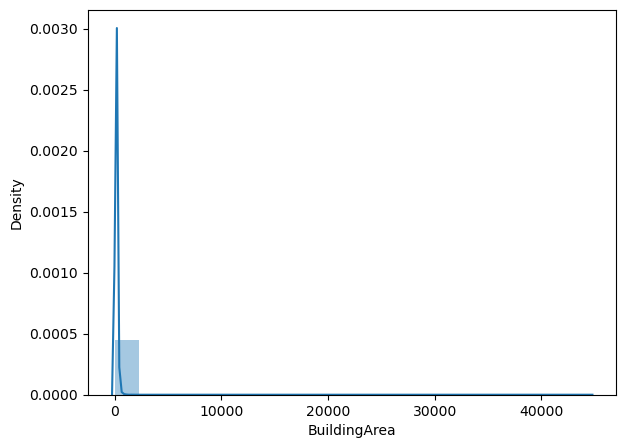

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['BuildingArea'],bins=20)

## since data is positively skewed, mean is affected by extreme values so we will use median to fill missing values in building area column, and same strategy will be used with columns having % of missing values >18 for columns having numericals

In [8]:
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].median())
null=df['BuildingArea'].isnull().sum()
null

0

C:\Users\aliiq\AppData\Local\Temp\ipykernel_18964\1743685934.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['YearBuilt'],bins=20)
C:\Users\aliiq\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='YearBuilt', ylabel='Density'>

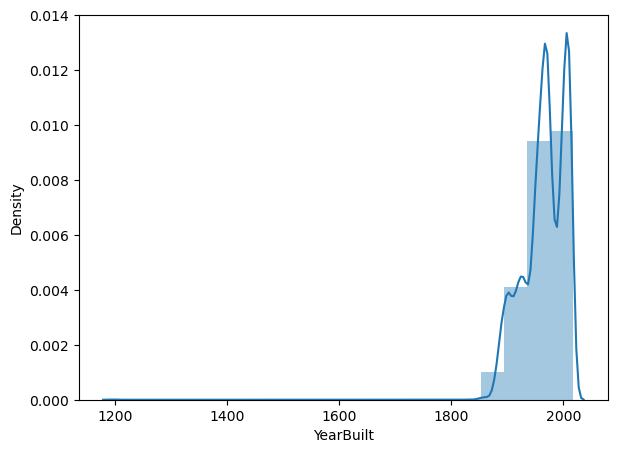

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['YearBuilt'],bins=20)



C:\Users\aliiq\AppData\Local\Temp\ipykernel_18964\102558982.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Landsize'],bins=20)
C:\Users\aliiq\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Landsize', ylabel='Density'>

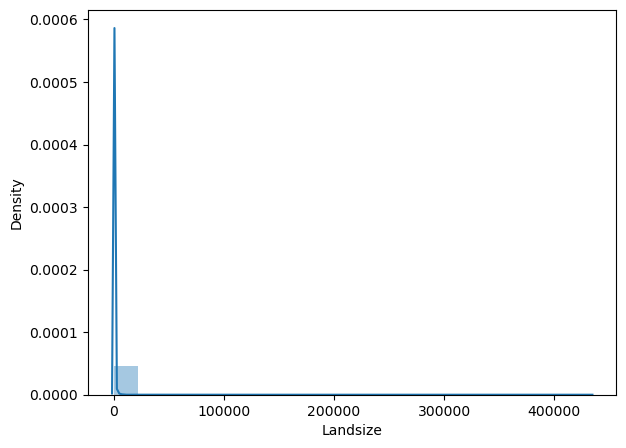

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['Landsize'],bins=20)

C:\Users\aliiq\AppData\Local\Temp\ipykernel_18964\472772606.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Car'],bins=20)
C:\Users\aliiq\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Car', ylabel='Density'>

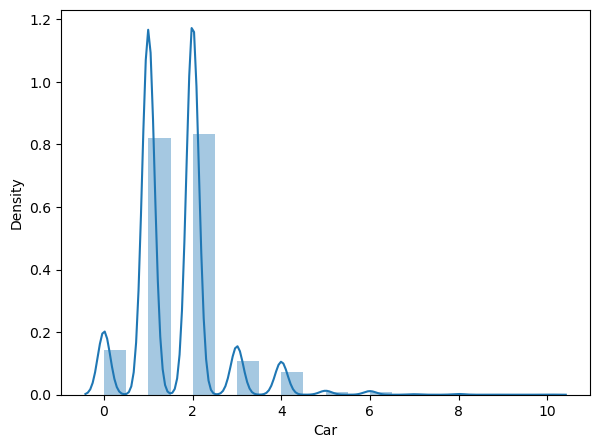

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['Car'],bins=20)

C:\Users\aliiq\AppData\Local\Temp\ipykernel_18964\2461004688.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bathroom'],bins=20)
C:\Users\aliiq\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Bathroom', ylabel='Density'>

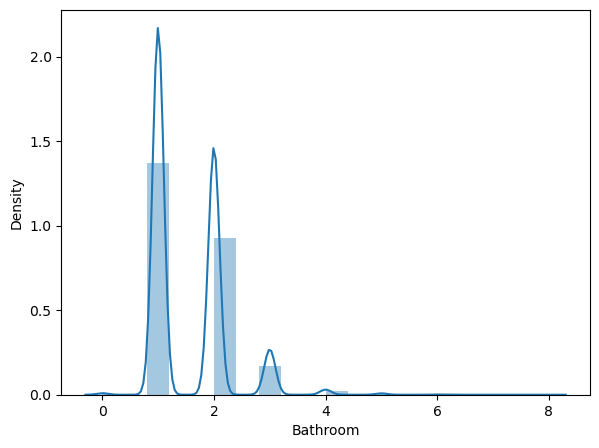

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['Bathroom'],bins=20)

C:\Users\aliiq\AppData\Local\Temp\ipykernel_18964\3670068517.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bedroom2'],bins=20)
C:\Users\aliiq\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Bedroom2', ylabel='Density'>

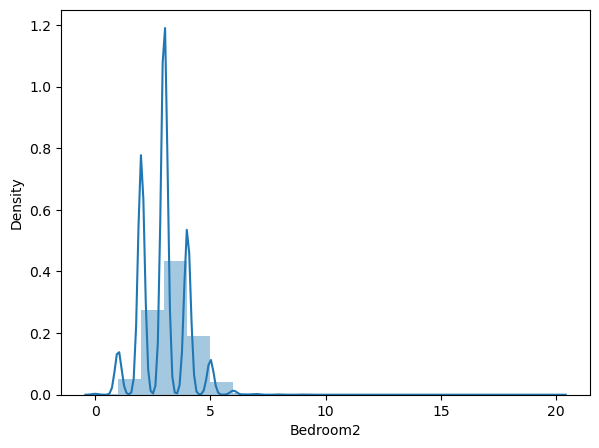

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['Bedroom2'],bins=20)

In [14]:
df.rename(columns={"Longtitude": "Longitude"}, inplace=True)
df.rename(columns={"Lattitude": "Latitude"}, inplace=True)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,126.0,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,126.0,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


C:\Users\aliiq\AppData\Local\Temp\ipykernel_18964\812464772.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Longitude'],bins=20)
C:\Users\aliiq\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Longitude', ylabel='Density'>

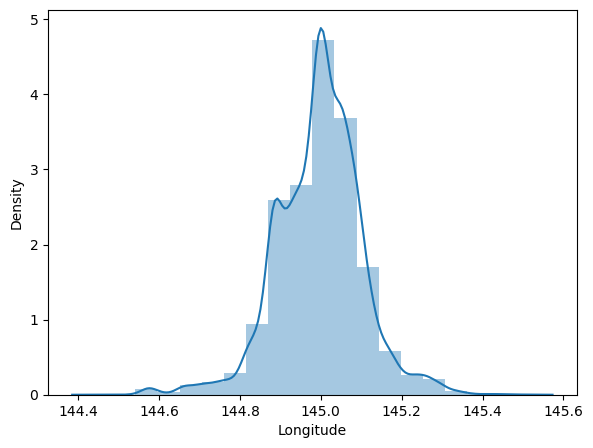

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['Longitude'],bins=20)

C:\Users\aliiq\AppData\Local\Temp\ipykernel_18964\1760199108.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Latitude'],bins=20)
C:\Users\aliiq\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Latitude', ylabel='Density'>

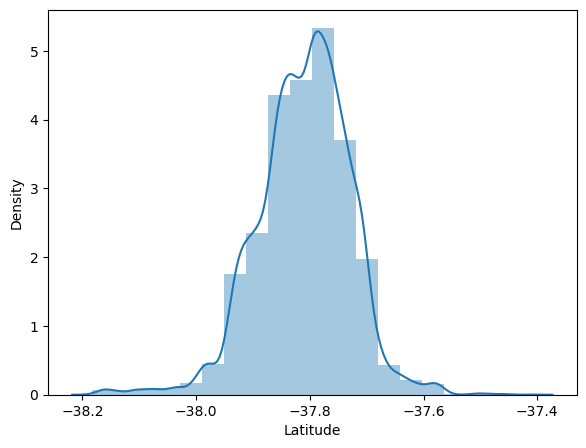

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['Latitude'],bins=20)

## we will use median to fill missing values (same reason that data is quite skewed, mean is effected by extreme values) for columns: Bedroom2,Bathroom,Car ,Landsize,YearBuilt. we will use mode to fill missing values for column CouncilArea
## we will use suburb and street address to get longitude and latitude for missing values of longitude and latitude using geopy library.

## for columns other than longitude and latitude

In [18]:
df['Bedroom2'] = df['Bedroom2'].fillna(df['Bedroom2'].median())
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median())
df['CouncilArea'] = df['CouncilArea'].fillna(df['CouncilArea'].mode()[0])
df['Landsize'] = df['Landsize'].fillna(df['Landsize'].median())
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].median())
df['Car'] = df['Car'].fillna(df['Car'].median())

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,126.0,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,126.0,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [20]:
missing=df.isnull().sum()
missing

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Latitude         3332
Longitude        3332
Regionname          1
Propertycount       1
dtype: int64

In [28]:
!pip install opencage

In [34]:

#from opencage.geocoder import OpenCageGeocode
from geopy.geocoders import OpenCage

# Initialize the geocoder with your API key
geocoder = OpenCage(api_key='76324d3c9974469689f1dafebc9d736c')  # Replace 'your_api_key' with your actual API key

# Define a function to geocode based on suburb and street address
def geocode_address(row):
    suburb = row['Suburb']
    street_address = row['Address']
    latitude = row['Latitude']
    longitude = row['Longitude']

    if pd.isnull(latitude) or pd.isnull(longitude):
        try:
            location = geocoder.geocode(f"{street_address},{suburb}")
            if location:
                return location.latitude, location.longitude
        except Exception as e:
            print(f"Error geocoding {suburb} - {street_address}: {e}")
    return latitude, longitude  # Return original values if geocoding fails or not needed

# Assuming 'df' is your DataFrame and 'suburb' and 'street_address' are the respective columns
df[['Latitude', 'Longitude']] = df.apply(geocode_address, axis=1, result_type='expand')

# Save the DataFrame with coordinates to a new CSV file
#df.to_csv('geocoded_data.csv', index=False)


Error geocoding Balwyn North - 1/39 Trentwood Av: Non-successful status code 402
Error geocoding Brighton - 16 Oakwood Av: Non-successful status code 402
Error geocoding Brighton - 3/4 Seaview Av: Non-successful status code 402
Error geocoding Ivanhoe - 3/11 Clark Rd: Non-successful status code 402
Error geocoding Keilor East - 48 Heather Av: Non-successful status code 402
Error geocoding Prahran - 13 Mary St: Non-successful status code 402
Error geocoding Prahran - 22/55 Union St: Non-successful status code 402
Error geocoding Prahran - 30 Union St: Non-successful status code 402
Error geocoding Prahran - 106/152 Peel St: Non-successful status code 402
Error geocoding Prahran - 32 Union St: Non-successful status code 402
Error geocoding Prahran - 8 Green St: Non-successful status code 402
Error geocoding Prahran - 113 Albert St: Non-successful status code 402
Error geocoding Ringwood East - 3 Wingate Av: Non-successful status code 402
Error geocoding Ringwood North - 28 Adolphson Av: 

In [35]:
null = pd.DataFrame({'Null Values':df.isnull().sum(),'Percentage null Values':df.isnull().sum()*100/len(df)})
null = null.sort_values('Percentage null Values',ascending=False)
null

,Null Values,Percentage null Values
Longitude,881,4.789085
Latitude,881,4.789085
Propertycount,1,0.005436
Regionname,1,0.005436
Distance,1,0.005436
Postcode,1,0.005436
Car,0,0.000000
CouncilArea,0,0.000000
YearBuilt,0,0.000000
BuildingArea,0,0.000000


## there were >18% rows in latitude and longitude column having missing values and now there are only about 4% and further filling of values isn't possible (may be the geopy api couldn't find coordinates for provided address and suburb).
now we will use missing no module to see if the remaining values are of what type (MNAR, MAR,MCAR ).




In [36]:
!pip install missingno

<Axes: >

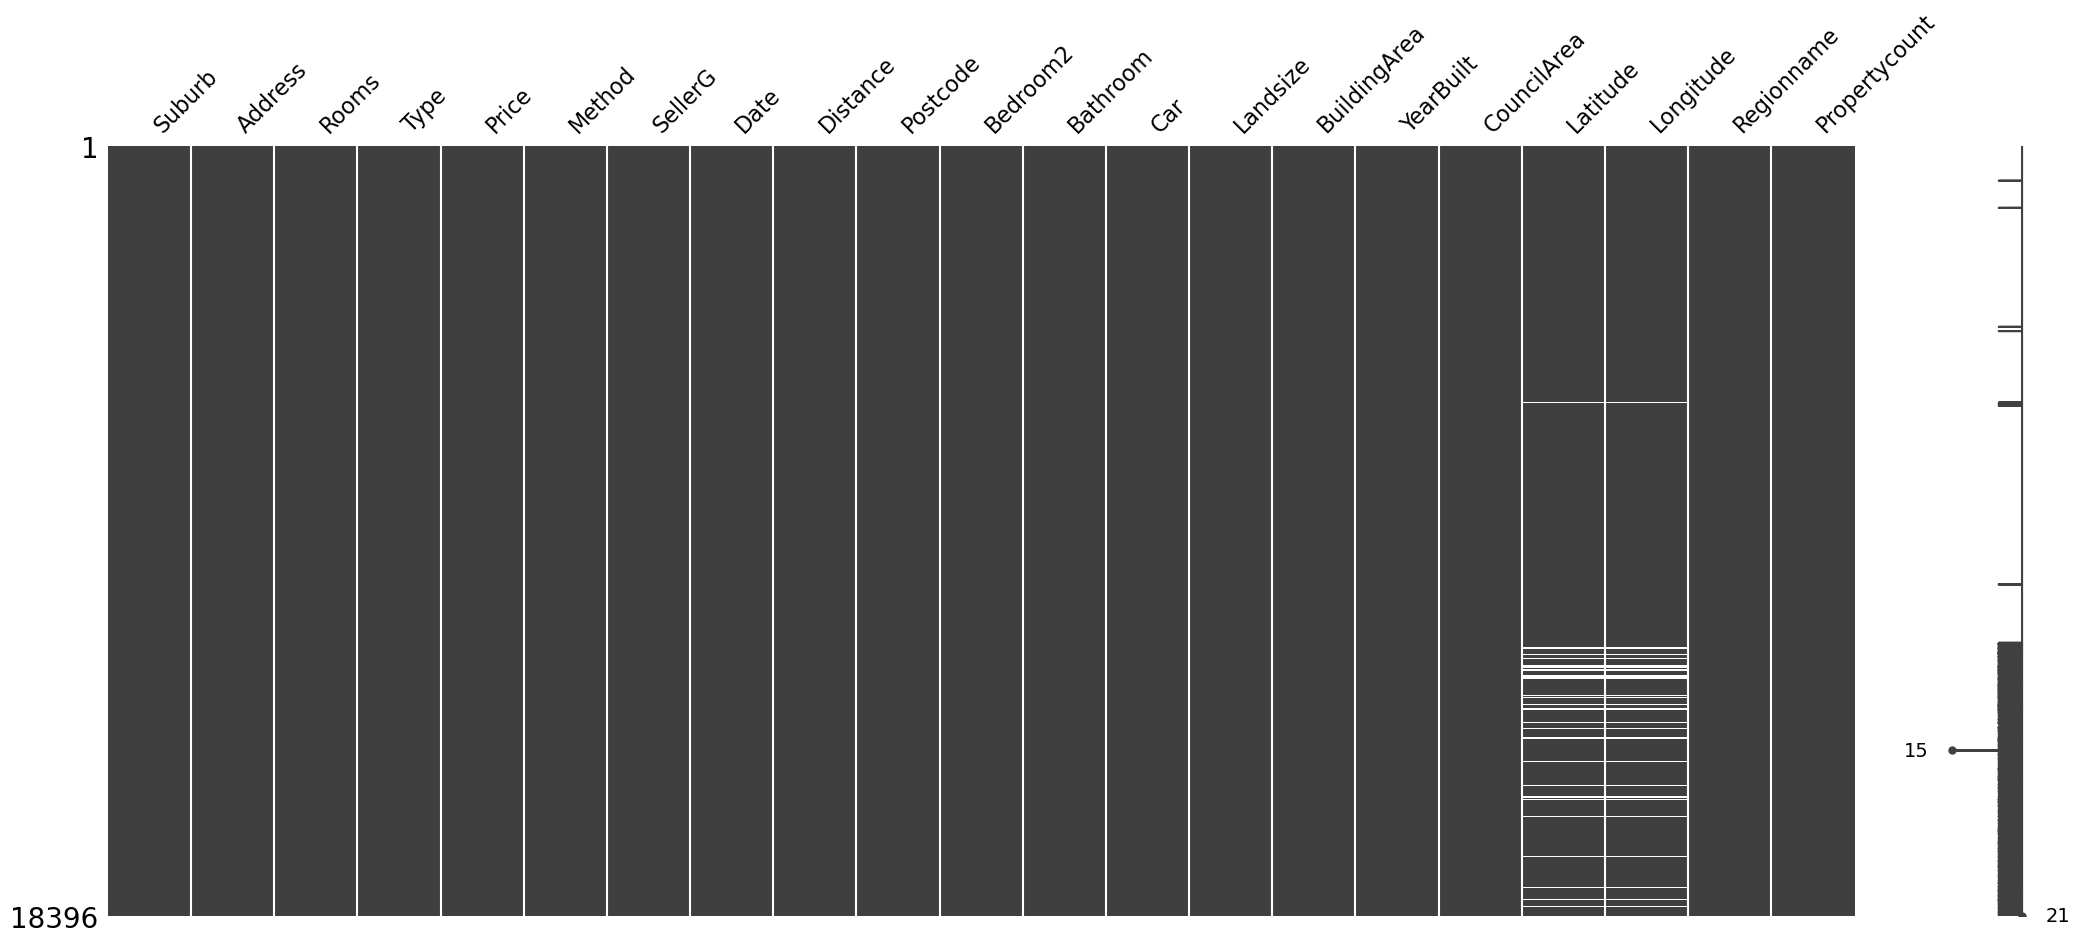

In [38]:
import missingno as msno
msno.matrix(df)

## longitude and latitude have same missing pattern and it is logical, now we will drop all rows having missing values

In [45]:
df.dropna(inplace=True)
null = pd.DataFrame({'Null Values':df.isnull().sum(),'Percentage null Values':df.isnull().sum()*100/len(df)})
null = null.sort_values('Percentage null Values',ascending=False)
null

,Null Values,Percentage null Values
Suburb,0,0.0
Landsize,0,0.0
BuildingAge,0,0.0
Month,0,0.0
Year,0,0.0
Propertycount,0,0.0
Regionname,0,0.0
Longitude,0,0.0
Latitude,0,0.0
CouncilArea,0,0.0


## now we will add date,year,month, building_age, total_rooms columns, change values of type and method  columns, and will drop unnecessary columns.

In [43]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['BuildingAge'] = datetime.now().year-df['YearBuilt']
df['TotalRooms'] = df['Rooms']+df['Bedroom2']

df['Type'] = df['Type'].map({'h':'house','t':'townhouse','u':'apartment'})
df['Method'] = df['Method'].map({'S':'property sold','SP':'property sold prior','PI':'property passed in',
                                 'VB':'vendor bid','SA':'sold after auction'})

# deop unnecessary columns
df.drop(['Postcode','YearBuilt'],axis=1,inplace=True)


In [44]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,...,BuildingArea,CouncilArea,Latitude,Longitude,Regionname,Propertycount,Year,Month,BuildingAge,TotalRooms
0,Abbotsford,85 Turner St,2,house,1480000,property sold,Biggin,2016-12-03,2.5,2.0,...,126.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,2016,12,54.0,4.0
1,Abbotsford,25 Bloomburg St,2,house,1035000,property sold,Biggin,2016-02-04,2.5,2.0,...,79.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,2016,2,124.0,4.0
2,Abbotsford,5 Charles St,3,house,1465000,property sold prior,Biggin,2017-03-04,2.5,3.0,...,150.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,2017,3,124.0,6.0
3,Abbotsford,40 Federation La,3,house,850000,property passed in,Biggin,2017-03-04,2.5,3.0,...,126.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,2017,3,54.0,6.0
4,Abbotsford,55a Park St,4,house,1600000,vendor bid,Nelson,2016-06-04,2.5,3.0,...,142.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,2016,6,10.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,Williamstown,8/2 Thompson St,2,townhouse,622500,property sold prior,Greg,2017-08-26,6.8,2.0,...,89.0,Moreland,-37.86393,144.90484,Western Metropolitan,6380.0,2017,8,14.0,4.0
18392,Williamstown,96 Verdon St,4,house,2500000,property passed in,Sweeney,2017-08-26,6.8,4.0,...,157.0,Moreland,-37.85908,144.89299,Western Metropolitan,6380.0,2017,8,104.0,8.0
18393,Yallambie,17 Amaroo Wy,4,house,1100000,property sold,Buckingham,2017-08-26,12.7,4.0,...,126.0,Moreland,-37.72006,145.10547,Northern Metropolitan,1369.0,2017,8,54.0,8.0
18394,Yarraville,6 Agnes St,4,house,1285000,property sold prior,Village,2017-08-26,6.3,4.0,...,112.0,Moreland,-37.81188,144.88449,Western Metropolitan,6543.0,2017,8,104.0,8.0


## our data is now clean and transformed and ready to be used for analysis

In [46]:
file_path = 'Documents/university/BI/Assignment-related/Property Sales of Melbourne City clean.csv'

# Save DataFrame to CSV file with specific path
df.to_csv(file_path, index=False)